# <center> Astronomicala Data (Tabular) - Visualizations

In [57]:
# Importing the libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
# Peek into the data by creating pandas dataframe
star_df = pd.read_csv('/content/cleaned_star_data.csv')
star_df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [59]:
# Check general information about the dataframe
star_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


### Data Cleaning

In [60]:
# Check for missing values
missing_values = star_df.isnull().sum()
missing_values

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [61]:
# Check for duplicates
duplicates = star_df.duplicated().sum()
duplicates

0

In [62]:
# Descriptive statistics to identify outliers
descriptive_stats = star_df.describe()
descriptive_stats

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


### Data Transformation

In [63]:
# Check data types
data_types = star_df.dtypes

In [64]:
# Converting 'Star type' to a categorical type
star_df['Star type'] = star_df['Star type'].astype('category')
star_df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


###  Descriptive Statistics

In [65]:
summary = star_df.describe(include='all')
summary

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
count,240.000000,240.000000,240.000000,240.000000,240.0,240,240
unique,NaN,NaN,NaN,NaN,6.0,5,7
top,NaN,NaN,NaN,NaN,0.0,Red,M
freq,NaN,NaN,NaN,NaN,40.0,116,111
mean,10497.462500,107188.361635,237.157781,4.382396,NaN,NaN,NaN
std,9552.425037,179432.244940,517.155763,10.532512,NaN,NaN,NaN
min,1939.000000,0.000080,0.008400,-11.920000,NaN,NaN,NaN
25%,3344.250000,0.000865,0.102750,-6.232500,NaN,NaN,NaN
50%,5776.000000,0.070500,0.762500,8.313000,NaN,NaN,NaN
75%,15055.500000,198050.000000,42.750000,13.697500,NaN,NaN,NaN


### Data Visualization

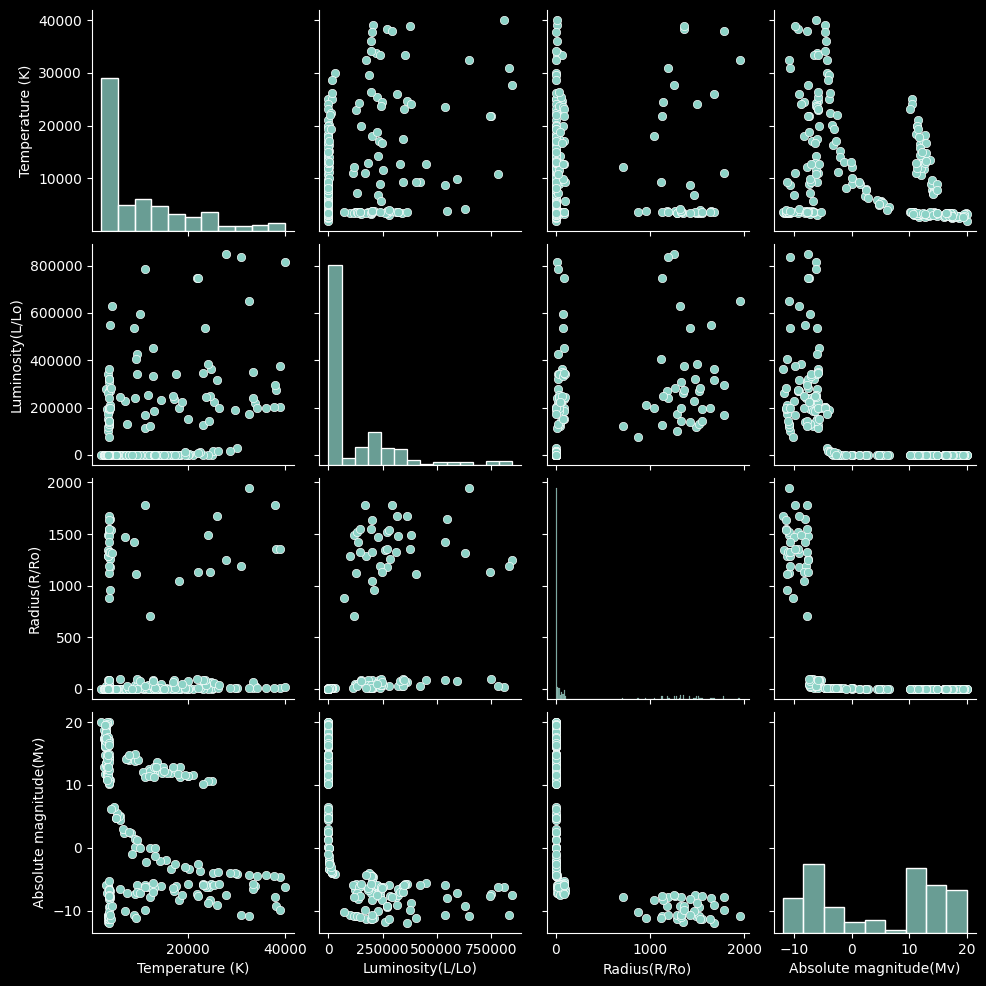

In [66]:
sns.pairplot(star_df)
plt.show()

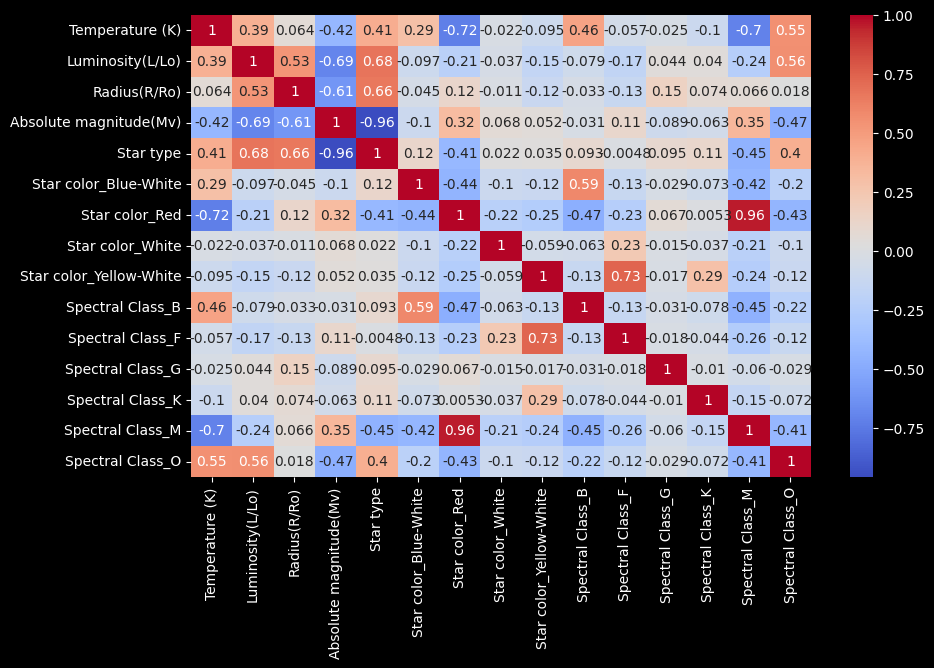

In [67]:
star_df_encoded = pd.get_dummies(star_df, columns=['Star color', 'Spectral Class'], drop_first=True)

plt.figure(figsize=(10, 6))
sns.heatmap(star_df_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()


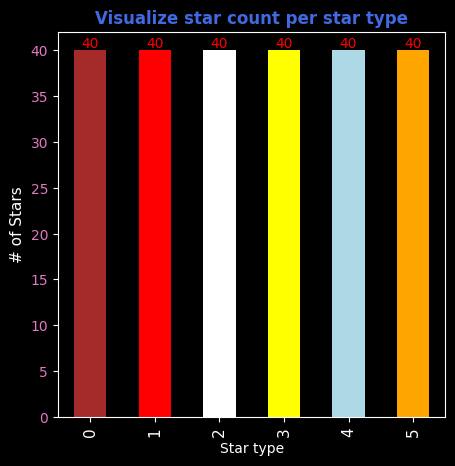

In [68]:
plt.figure(figsize=(5,5))
plt.style.use('dark_background')
ax = star_df['Star type'].value_counts().plot(kind='bar', color=['brown', 'red', 'white', 'yellow', 'lightblue', 'orange'])
ax.bar_label(ax.containers[0], color='red')
plt.title('Visualize star count per star type', color='royalblue', weight='bold')
plt.yticks(color='tab:pink')
plt.ylabel('# of Stars', color='white', fontsize=11)
plt.xticks(color='white', fontsize=11)
plt.show()

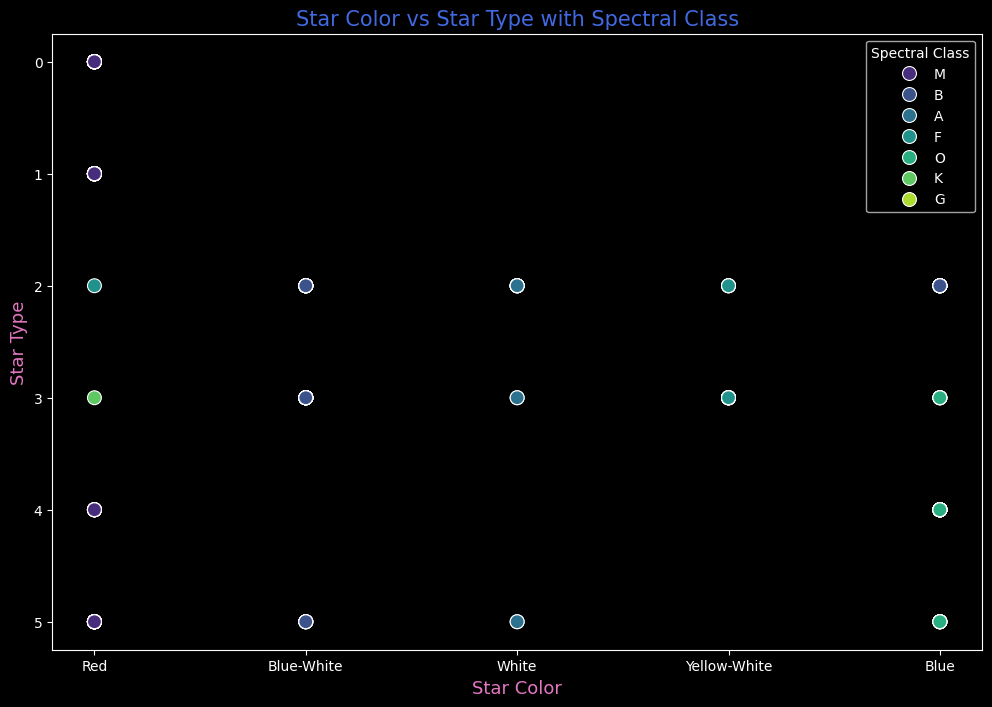

In [69]:
# Scatter plot for visualizing Star color vs Star type
plt.figure(figsize=(12, 8))
sns.scatterplot(data=star_df, x='Star color', y='Star type', hue='Spectral Class', palette='viridis', s=100)
plt.title('Star Color vs Star Type with Spectral Class', fontsize=15, color='royalblue')
plt.xlabel('Star Color', fontsize=13, color='tab:pink')
plt.ylabel('Star Type', fontsize=13, color='tab:pink')
plt.legend(title='Spectral Class')
plt.show()

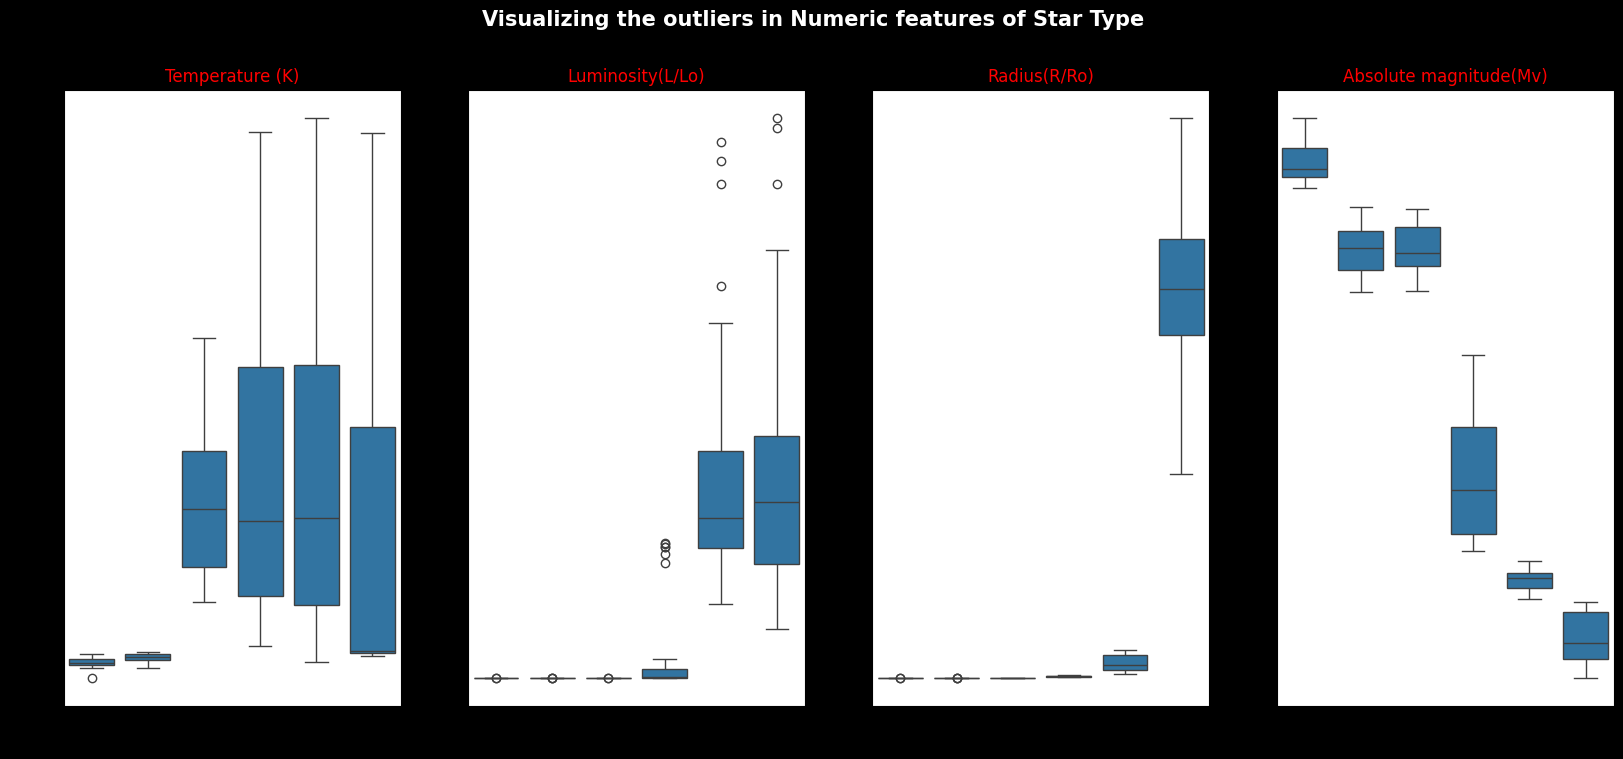

In [70]:
# Visualize Outliers in the Data
plt.figure(figsize=(20,8))
plt.style.use('default')
plt.suptitle('Visualizing the outliers in Numeric features of Star Type',
             color='white', weight='bold', fontsize=15)

# Using for loop to easily repeat some steps to create subplot
for i in range(4):
  plt.subplot(1, 4, i+1)
  sns.boxplot(x=star_df['Star type'], y=star_df.iloc[:, i])
  plt.title(star_df.columns[i], color='red')
  plt.ylabel('')


Text(0.5, 1.0, 'Absolute magnitude(Mv)')

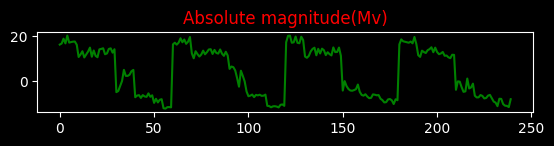

In [78]:
plt.subplot(4, 1, i+1)
plt.plot(star_df.iloc[:,i], color=colors[i])
plt.title(star_df.columns[i], color='red')

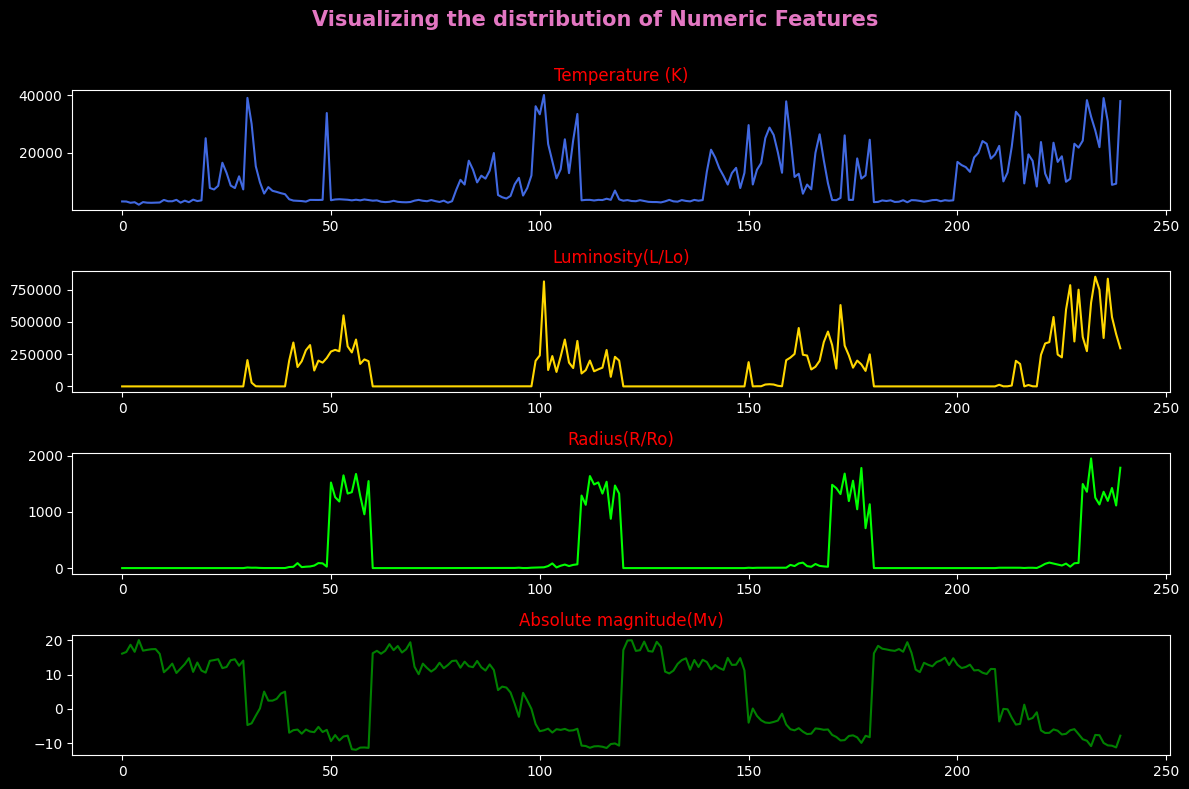

In [77]:
# Line Plots

# Colors to add in line plots
colors = ['royalblue', 'gold', 'lime', 'green']

# Add figure size and title to subplot
plt.figure(figsize=(12,8))
plt.suptitle('Visualizing the distribution of Numeric Features\n',
             color='tab:pink', fontsize=15, weight='bold')

# Use for loop and the function that creates subplot of line plots
for i in range(4):
  line_subplot(star_df, colors, i)

# Use tight_layout() to automatically adjust the spacing in subplot
plt.tight_layout()

# Save the figure
plt.show()

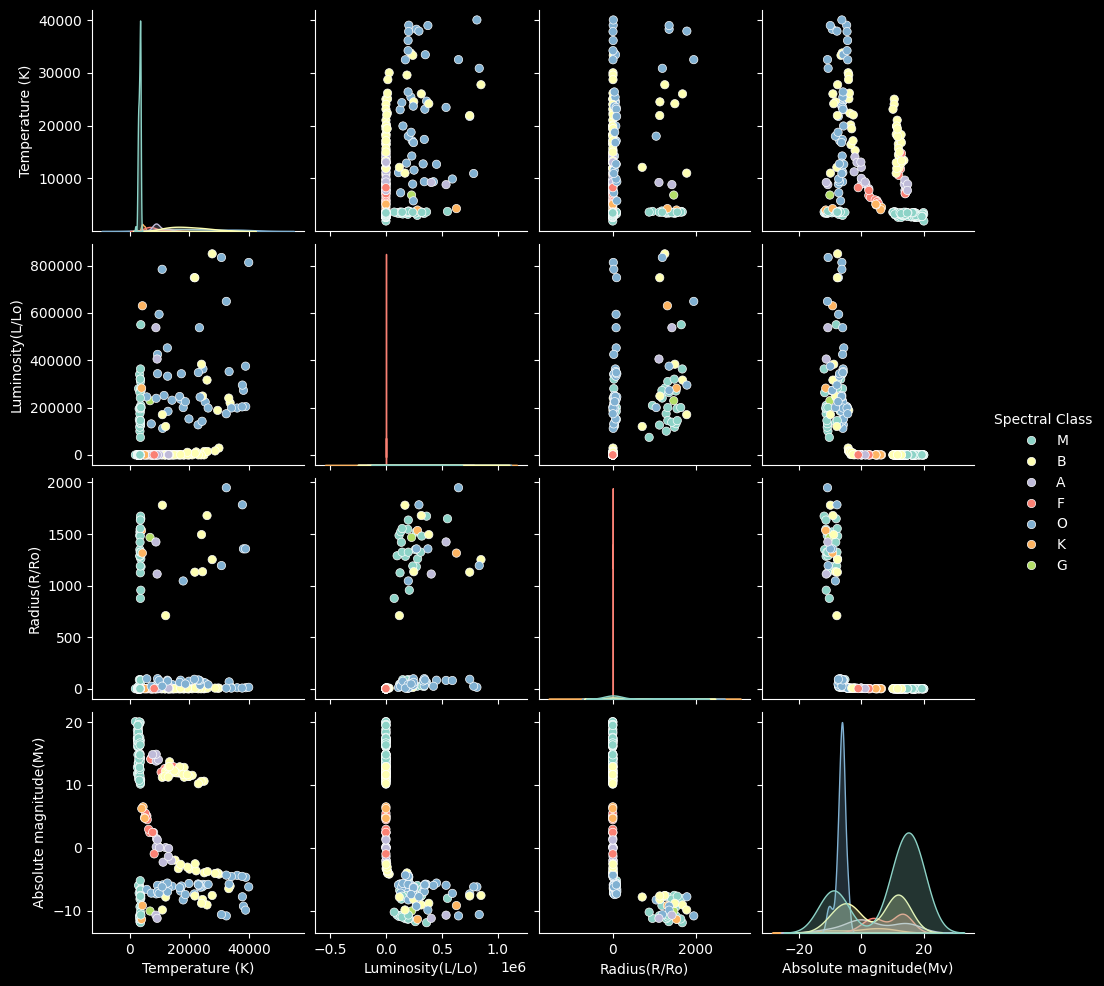

In [73]:
# Get a pairplot - scatter
plt.style.use('dark_background')
sns.pairplot(star_df, hue='Spectral Class')
plt.show()

In [74]:
# Hertzsprung-Russell Diagram
temperature = star_df['Temperature (K)']
abs_mag = star_df['Absolute magnitude(Mv)']
star_type = star_df['Star type']

star_types = {
    0: {'label': 'Brown Dwarfs', 'color': 'brown', 'size': 10, 'marker': 'o'},
    1: {'label': 'Red Dwarfs', 'color': 'red', 'size': 20, 'marker': 'o'},
    2: {'label': 'White Dwarfs', 'color': 'white', 'size': 30, 'marker': 'o'},
    3: {'label': 'Main Sequence', 'color': 'cyan', 'size': 30, 'marker': 'o'},
    4: {'label': 'Supergiants', 'color': 'orange', 'size': 100, 'marker': 'o'},
    5: {'label': 'Hypergiants', 'color': 'maroon', 'size': 150, 'marker': 'o'}
}

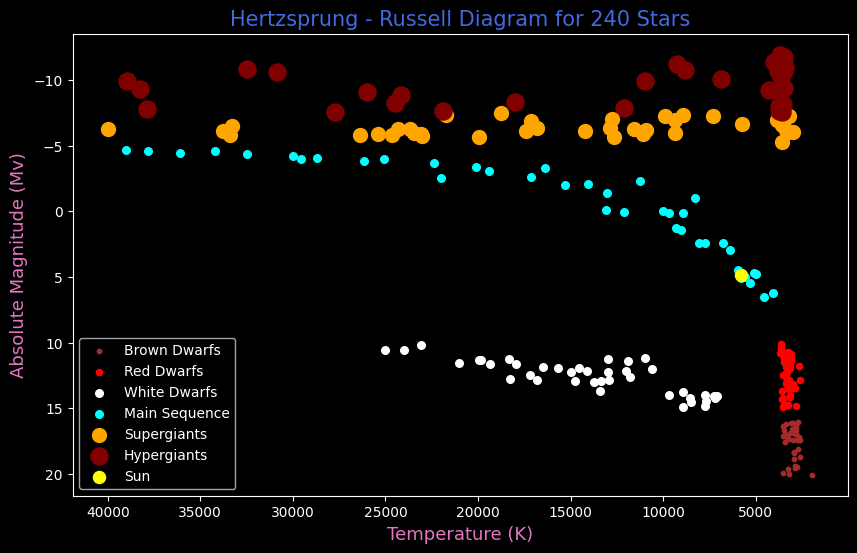

In [75]:
plt.figure(figsize=(10, 6))

# For each star in the data
for i in range(len(star_type)):
    properties = star_types[star_type[i]]
    plt.scatter(temperature[i], abs_mag[i], s=properties['size'], c=properties['color'], marker=properties['marker'], label=properties['label'] if properties['label'] not in plt.gca().get_legend_handles_labels()[1] else "")

# Adding data for sun
plt.scatter(5778, 4.83, s=75, c="yellow", marker='o', label="Sun")

# Add title and labels
plt.title(f"Hertzsprung - Russell Diagram for {len(star_type)} Stars", fontsize=15, color='royalblue')
plt.ylabel("Absolute Magnitude (Mv)", fontsize=13, color='tab:pink')
plt.xlabel("Temperature (K)", fontsize=13, color='tab:pink')

# Visualize the labels
plt.legend()

# Invert the axes
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.show()